In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_collisions = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', dtype=unicode)
df_collisions = df_collisions.drop(['LOCATION', 'CONTRIBUTING FACTOR VEHICLE 3',
                                   'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1)
df_collisions['INTERSECTION'] = df_collisions['ON STREET NAME'] + ' x ' + df_collisions['CROSS STREET NAME']

df_collisions.loc[:, 'LATITUDE'] = map(float, df_collisions['LATITUDE'])
df_collisions.loc[:, 'LONGITUDE'] = map(float, df_collisions['LONGITUDE'])
df_collisions.loc[:,'NUMBER OF PERSONS KILLED'] = map(int, df_collisions['NUMBER OF PERSONS KILLED'])
df_collisions.loc[:,'NUMBER OF PEDESTRIANS KILLED'] = map(int, df_collisions['NUMBER OF PEDESTRIANS KILLED'])
df_collisions.loc[:,'NUMBER OF CYCLIST KILLED'] = map(int, df_collisions['NUMBER OF CYCLIST KILLED'])
df_collisions.loc[:,'NUMBER OF PERSONS INJURED'] = map(int, df_collisions['NUMBER OF PERSONS INJURED'])
df_collisions.loc[:,'NUMBER OF PEDESTRIANS INJURED'] = map(int, df_collisions['NUMBER OF PEDESTRIANS INJURED'])
df_collisions.loc[:,'NUMBER OF CYCLIST INJURED'] = map(int, df_collisions['NUMBER OF CYCLIST INJURED'])

df_collisions['NUMBER OF PASSENGERS KILLED'] = df_collisions['NUMBER OF PERSONS KILLED'] - df_collisions['NUMBER OF PEDESTRIANS KILLED'] - df_collisions['NUMBER OF CYCLIST KILLED']
df_collisions['NUMBER OF PASSENGERS INJURED'] = df_collisions['NUMBER OF PERSONS INJURED'] - df_collisions['NUMBER OF PEDESTRIANS INJURED'] - df_collisions['NUMBER OF CYCLIST INJURED']

mask_fatal = (df_collisions['NUMBER OF PERSONS KILLED'] > 0)
df_fatal = df_collisions[mask_fatal]

mask_injured = (df_collisions['NUMBER OF PERSONS INJURED'] > 0)
df_injured = df_collisions[mask_injured]

s_driversLicenses = Series({'BRONX':456847, 'BROOKLYN':983769, 'MANHATTAN':748543,'QUEENS':1134064, 'STATEN ISLAND':304250})
s_registeredVehicles = Series({'BRONX':272483, 'BROOKLYN': 498282, 'MANHATTAN':254159, 'QUEENS':808122, 'STATEN ISLAND':274275})
# Daytime Populations
s_population = Series({'BRONX': 1206423, 'BROOKLYN': 2170477, 'MANHATTAN': 3083102, 'QUEENS': 1846101, 'STATEN ISLAND': 381322})

df_collisions.columns.values

array(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'INTERSECTION', 'NUMBER OF PASSENGERS KILLED',
       'NUMBER OF PASSENGERS INJURED'], dtype=object)

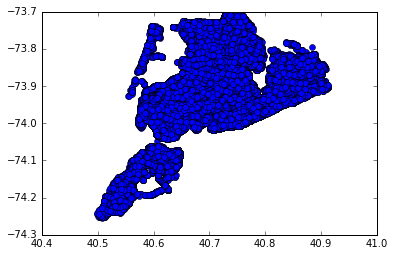

In [3]:
plot(df_collisions['LATITUDE'], df_collisions['LONGITUDE'], marker='o', color='blue', linestyle='None')

# INTERSECTIONS

---

In [4]:
df_intersections = df_collisions[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION']].dropna(subset=['INTERSECTION'])
df_intersections = df_intersections.fillna('Missing')

df_intersections_fatal = df_fatal[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 'NUMBER OF PERSONS KILLED', 
                                   'NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED', 
                                   'NUMBER OF PASSENGERS KILLED']].dropna(subset=['INTERSECTION'])
df_intersections_fatal = df_intersections_fatal.fillna('Missing')

df_intersections_injured = df_injured[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 'NUMBER OF PERSONS INJURED',
                                      'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED',
                                      'NUMBER OF PASSENGERS INJURED']].dropna(subset=['INTERSECTION'])
df_intersections_injured = df_intersections_injured.fillna('Missing')

## Overall

In [135]:
df_intersectionCounts1 = DataFrame(df_intersections.groupby(['BOROUGH', 
                                                            'INTERSECTION',])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                                            ascending=False)
df_intersectionCounts2 = DataFrame(df_intersections.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH', 
                                                            'INTERSECTION',])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                                            ascending=False)
df_intersectionCounts1.columns = ['COLLISIONS']
df_intersectionCounts2.columns = ['COLLISIONS']

df_top20_intersections = df_intersectionCounts2[:20]
df_top10_intersections = df_intersectionCounts2[:10]
df_top10_intersections1 = df_intersectionCounts1[:10]

df_top10_intersections1.to_csv('top10_intersections.csv')
df_top10_intersections1

# Flatbush Ave. x Grand Army Plaza - Brooklyn
# Rockaway Blvd. x Brookville Blvd. - Queens

COLLISIONS
BOROUGH   INTERSECTION                                          
Missing   FLATBUSH AVENUE x GRAND ARMY PLAZA                 203
          ROCKAWAY BOULEVARD x BROOKVILLE BOULEVARD          197
MANHATTAN EAST 59 STREET x 2 AVENUE                          195
          WEST 42 STREET x 8 AVENUE                          184
          EAST 36 STREET x 2 AVENUE                          171
          EAST 57 STREET x 3 AVENUE                          171
BROOKLYN  TILLARY STREET x FLATBUSH AVENUE EXTENSION         159
MANHATTAN EAST 57 STREET x 2 AVENUE                          158
BROOKLYN  GATEWAY DRIVE x ERSKINE STREET                     156
MANHATTAN WEST 34 STREET x 7 AVENUE                          154

In [65]:
lat_top10_intersections = df_top10_intersections.index.get_level_values('LATITUDE')
long_top10_intersections = df_top10_intersections.index.get_level_values('LONGITUDE')

In [136]:
df_fatalCounts = DataFrame(df_intersections_fatal.groupby(['LATITUDE', 'LONGITUDE','BOROUGH', 
                                                           'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                              ascending=False)
df_fatalCounts1 = DataFrame(df_intersections_fatal.groupby(['BOROUGH', 
                                                           'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                              ascending=False)
df_fatalCounts.columns = ['FATAL COLLISIONS']
df_fatalCounts1.columns = ['FATAL COLLISIONS']
df_topFatal = df_fatalCounts[df_fatalCounts['FATAL COLLISIONS'] > 1]
df_topFatal1 = df_fatalCounts1[df_fatalCounts1['FATAL COLLISIONS'] > 1]

df_topFatal1.to_csv('topFatal.csv')
df_topFatal1

# 46 Ave. x Utopia Pkwy - Queens
# Cypress Ave. x Jackie Robinson Pkwy Svc Rd - Brooklyn
# Rockaway Blvd x Brookville Blvd - Queens

FATAL COLLISIONS
BOROUGH   INTERSECTION                                                     
Missing   46 AVENUE x UTOPIA PARKWAY                                      3
QUEENS    FRANCIS LEWIS BOULEVARD x 48 AVENUE                             2
          ASTORIA BOULEVARD x 80 STREET                                   2
BROOKLYN  UTICA AVENUE x AVENUE D                                         2
MANHATTAN EAST 54 STREET x 1 AVENUE                                       2
Missing   CYPRESS AVENUE x JACKIE ROBINSON PARKWAY SVC RD                 2
          ROCKAWAY BOULEVARD x BROOKVILLE BOULEVARD                       2
BROOKLYN  ERSKINE STREET x GATEWAY DRIVE                                  2
          LINDEN BOULEVARD x ASHFORD STREET                               2
QUEENS    SOUTH CONDUIT AVENUE x 130 STREET                               2
          56 ROAD x 48 STREET                                             2

In [64]:
lat_topFatal = list(df_topFatal.index.get_level_values('LATITUDE'))
lat_topFatal.remove('Missing')
lat_topFatal.remove('Missing')
lat_topFatal.remove('Missing')
long_topFatal = list(df_topFatal.index.get_level_values('LONGITUDE'))
long_topFatal.remove('Missing')
long_topFatal.remove('Missing')
long_topFatal.remove('Missing')

In [137]:
df_injuredCounts = DataFrame(df_intersections_injured.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH', 
                                                              'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                                   ascending=False)
df_injuredCounts1 = DataFrame(df_intersections_injured.groupby(['BOROUGH', 
                                                              'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                                   ascending=False)
df_injuredCounts.columns = ['COLLISIONS RESULTING IN INJURY']
df_injuredCounts1.columns = ['COLLISIONS RESULTING IN INJURY']
df_top20_injured = df_injuredCounts[:20]
df_top10_injured = df_injuredCounts[:10]
df_top10_injured1 = df_injuredCounts1[:10]

df_top10_injured1.to_csv('top10_injured.csv')
df_top10_injured1

# Rockaway Blvd x Brookville Blvd - Queens

COLLISIONS RESULTING IN INJURY
BOROUGH   INTERSECTION                                                             
Missing   ROCKAWAY BOULEVARD x BROOKVILLE BOULEVARD                              54
BROOKLYN  ATLANTIC AVENUE x LOGAN STREET                                         38
MANHATTAN EAST 125 STREET x LEXINGTON AVENUE                                     34
BROOKLYN  ATLANTIC AVENUE x GEORGIA AVENUE                                       31
MANHATTAN WEST 125 STREET x LENOX AVENUE                                         30
BROOKLYN  PENNSYLVANIA AVENUE x LINDEN BOULEVARD                                 28
          FLATBUSH AVENUE x AVENUE H                                             28
          FLATBUSH AVENUE x EMPIRE BOULEVARD                                     28
BRONX     BRUCKNER BOULEVARD x HUNTS POINT AVENUE                                26
BROOKLYN  EASTERN PARKWAY x UTICA AVENUE                                         26

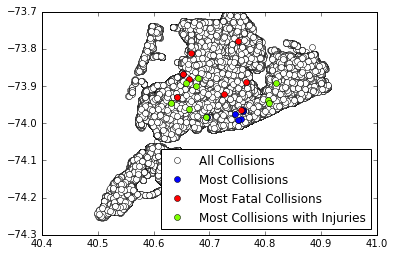

In [114]:
lat_top10_injured = df_top10_injured.index.get_level_values('LATITUDE')
long_top10_injured = df_top10_injured.index.get_level_values('LONGITUDE')

plot(df_collisions['LATITUDE'], df_collisions['LONGITUDE'], marker='o', color='white', linestyle='None', label='All Collisions')
plot(lat_top10_intersections[2:], long_top10_intersections[2:], marker='o', color='blue', linestyle='None', label='Most Collisions')
plot(lat_topFatal, long_topFatal, marker='o', color='red', linestyle='None', label='Most Fatal Collisions')
plot(lat_top10_injured[1:], long_top10_injured[1:], marker='o', color='chartreuse', linestyle= 'None', label='Most Collisions with Injuries')
xlim(40.4,41)
ylim(-74.3, -73.7)
legend(numpoints=1, loc='best')

savefig('map_collisions.png')

## Pedestrians

### Fatal

In [138]:
df_pedFatal = df_intersections_fatal[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 'NUMBER OF PEDESTRIANS KILLED']]
df_pedFatal = df_pedFatal[df_pedFatal['NUMBER OF PEDESTRIANS KILLED'] > 0]

df_pedFatal_counts = DataFrame(df_pedFatal.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH', 
                                                'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                      ascending=False)
df_pedFatal_counts1 = DataFrame(df_pedFatal.groupby(['BOROUGH', 
                                                'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                      ascending=False)
df_pedFatal_counts.columns = ['COLLISIONS KILLING PEDS']
df_pedFatal_counts1.columns = ['COLLISIONS KILLING PEDS']
df_topPedFatal_counts = df_pedFatal_counts[df_pedFatal_counts['COLLISIONS KILLING PEDS'] > 1]
df_topPedFatal_counts1 = df_pedFatal_counts1[df_pedFatal_counts1['COLLISIONS KILLING PEDS'] > 1]

df_topPedFatal_counts1.to_csv('topPedFatal.csv')
df_topPedFatal_counts1

# 46 Ave. x Utopia Pkwy - Queens

,,COLLISIONS KILLING PEDS
BOROUGH,INTERSECTION,
Missing,46 AVENUE x UTOPIA PARKWAY,3
MANHATTAN,EAST 54 STREET x 1 AVENUE,2
BROOKLYN,LINDEN BOULEVARD x ASHFORD STREET,2
QUEENS,ASTORIA BOULEVARD x 80 STREET,2


In [82]:
df_topPedIntersection_fatal = df_collisions[df_collisions['INTERSECTION'] == '46 AVENUE x UTOPIA PARKWAY']
df_topPedIntersection_fatal.loc[:,'NUMBER OF PEDESTRIANS INJURED'] = map(int, df_topPedIntersection_fatal['NUMBER OF PEDESTRIANS INJURED'])
df_topPedIntersection_fatal.loc[:, 'NUMBER OF PEDESTRIANS KILLED'] = map(int, df_topPedIntersection_fatal['NUMBER OF PEDESTRIANS KILLED'])

collisions_topPedIntersection_fatal = len(df_topPedIntersection_fatal)
pedsInjured_topPedIntersection_fatal = df_topPedIntersection_fatal['NUMBER OF PEDESTRIANS INJURED'].sum()
pedsKilled_topPedIntersection_fatal = df_topPedIntersection_fatal['NUMBER OF PEDESTRIANS KILLED'].sum()

print '46 Avenue x Utopia Pkwy (Queens) : %d total collisions - %d pedestrians injured, %d killed' % (collisions_topPedIntersection_fatal,
                                                                                                      pedsInjured_topPedIntersection_fatal,
                                                                                                      pedsKilled_topPedIntersection_fatal)

46 Avenue x Utopia Pkwy (Queens) : 15 total collisions - 2 pedestrians injured, 3 killed


In [86]:
lat_topPedFatal = list(df_topPedFatal_counts.index.get_level_values('LATITUDE'))
lat_topPedFatal.remove('Missing')
long_topPedFatal = list(df_topPedFatal_counts.index.get_level_values('LONGITUDE'))
long_topPedFatal.remove('Missing')

### Injuries

In [139]:
df_pedInjured = df_intersections_injured[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 
                                          'NUMBER OF PEDESTRIANS INJURED']]
df_pedInjured = df_pedInjured[df_pedInjured['NUMBER OF PEDESTRIANS INJURED'] > 0]

df_pedInjured_counts = DataFrame(df_pedInjured.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH',
                                                       'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                              ascending=False)
df_pedInjured_counts1 = DataFrame(df_pedInjured.groupby(['BOROUGH',
                                                       'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                              ascending=False)
df_pedInjured_counts.columns = ['COLLISIONS INJURING PEDS']
df_pedInjured_counts1.columns = ['COLLISIONS INJURING PEDS']
df_top20_pedInjured = df_pedInjured_counts[:20]
df_top10_pedInjured = df_pedInjured_counts[:10]
df_top10_pedInjured1 = df_pedInjured_counts1[:10]

df_top10_pedInjured1.to_csv('top10_pedInjured.csv')
df_top10_pedInjured1

COLLISIONS INJURING PEDS
BOROUGH   INTERSECTION                                                       
MANHATTAN EAST 125 STREET x LEXINGTON AVENUE                               21
          WEST 42 STREET x 8 AVENUE                                        14
BROOKLYN  EASTERN PARKWAY x UTICA AVENUE                                   13
          FLATBUSH AVENUE x AVENUE H                                       13
          FLATBUSH AVENUE EXTENSION x MYRTLE AVENUE                        13
MANHATTAN EAST 14 STREET x 3 AVENUE                                        12
          WEST 34 STREET x 5 AVENUE                                        12
          WEST 42 STREET x 7 AVENUE                                        12
BROOKLYN  CONEY ISLAND AVENUE x AVENUE O                                   11
BRONX     EAST FORDHAM ROAD x WEBSTER AVENUE                               11

In [11]:
df_topPedIntersection = df_collisions[df_collisions['INTERSECTION'] == 'EAST 125 STREET x LEXINGTON AVENUE']
df_topPedIntersection.loc[:,'NUMBER OF PEDESTRIANS INJURED'] = map(int, df_topPedIntersection['NUMBER OF PEDESTRIANS INJURED'])
df_topPedIntersection.loc[:, 'NUMBER OF PEDESTRIANS KILLED'] = map(int, df_topPedIntersection['NUMBER OF PEDESTRIANS KILLED'])

collisions_topPedIntersection = len(df_topPedIntersection)
pedsInjured_topPedIntersection = df_topPedIntersection['NUMBER OF PEDESTRIANS INJURED'].sum()
pedsKilled_topPedIntersection = df_topPedIntersection['NUMBER OF PEDESTRIANS KILLED'].sum()

print 'East 125 St and Lexington Ave (Manhattan) : %d total collisions (21 involving pedestrians) - %d pedestrians injured, %d killed' % (collisions_topPedIntersection,
                                                                                                                                          pedsInjured_topPedIntersection,
                                                                                                                                          pedsKilled_topPedIntersection)

East 125 St and Lexington Ave (Manhattan) : 106 total collisions (21 involving pedestrians) - 23 pedestrians injured, 0 killed


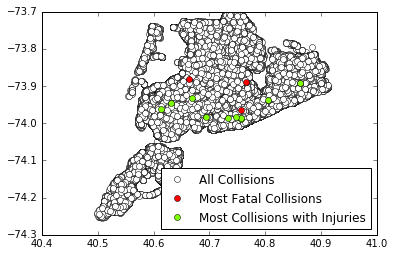

In [113]:
lat_top10_pedInjured = list(df_top10_pedInjured.index.get_level_values('LATITUDE'))
long_top10_pedInjured = list(df_top10_pedInjured.index.get_level_values('LONGITUDE'))

plot(df_collisions['LATITUDE'], df_collisions['LONGITUDE'], marker='o', color='white', linestyle='None', label='All Collisions')
plot(lat_topPedFatal, long_topPedFatal, marker='o', color='red', linestyle='None', label='Most Fatal Collisions')
plot(lat_top10_pedInjured, long_top10_pedInjured, marker='o', color='chartreuse', linestyle= 'None', label='Most Collisions with Injuries')
xlim(40.4,41)
ylim(-74.3, -73.7)
legend(numpoints=1, loc='best')

savefig('map_pedestrian.png')

## Passengers

### Fatal

In [140]:
df_passengerFatal = df_intersections_fatal[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 'NUMBER OF PASSENGERS KILLED']]
df_passengerFatal = df_passengerFatal[df_passengerFatal['NUMBER OF PASSENGERS KILLED'] > 0]

df_passengerFatal_counts = DataFrame(df_passengerFatal.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH', 
                                                'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                      ascending=False)
df_passengerFatal_counts1 = DataFrame(df_passengerFatal.groupby(['BOROUGH', 
                                                'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION', 
                                                                                                      ascending=False)
df_passengerFatal_counts.columns = ['COLLISIONS KILLING PASSENGERS']
df_passengerFatal_counts1.columns = ['COLLISIONS KILLING PASSENGERS']
df_topPassengerFatal = df_passengerFatal_counts[df_passengerFatal_counts['COLLISIONS KILLING PASSENGERS'] > 1]
df_topPassengerFatal1 = df_passengerFatal_counts1[df_passengerFatal_counts1['COLLISIONS KILLING PASSENGERS'] > 1]

df_topPassengerFatal1.to_csv('topPassengerFatal.csv')
df_topPassengerFatal1

# Cypress Ave x Jackie Robinson Pkwy - Brooklyn

,,COLLISIONS KILLING PASSENGERS
BOROUGH,INTERSECTION,
BROOKLYN,ERSKINE STREET x GATEWAY DRIVE,2
Missing,CYPRESS AVENUE x JACKIE ROBINSON PARKWAY SVC RD,2
QUEENS,FRANCIS LEWIS BOULEVARD x 48 AVENUE,2


In [104]:
lat_topPassengerFatal = list(df_topPassengerFatal.index.get_level_values('LATITUDE'))
lat_topPassengerFatal.remove('Missing')
long_topPassengerFatal = list(df_topPassengerFatal.index.get_level_values('LONGITUDE'))
long_topPassengerFatal.remove('Missing')

### Injuries

In [143]:
df_passengerInjured = df_intersections_injured[['LATITUDE', 'LONGITUDE', 'BOROUGH', 'INTERSECTION', 
                                                'NUMBER OF PASSENGERS INJURED']]
df_passengerInjured = df_passengerInjured[df_passengerInjured['NUMBER OF PASSENGERS INJURED'] > 0]

df_passengerInjured_counts = DataFrame(df_passengerInjured.groupby(['LATITUDE', 'LONGITUDE', 'BOROUGH',
                                                       'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                              ascending=False)
df_passengerInjured_counts1 = DataFrame(df_passengerInjured.groupby(['BOROUGH',
                                                       'INTERSECTION'])['INTERSECTION'].count()).sort_values('INTERSECTION',
                                                                                                              ascending=False)
df_passengerInjured_counts.columns = ['COLLISIONS INJURING PASSENGERS']
df_passengerInjured_counts1.columns = ['COLLISIONS INJURING PASSENGERS']
df_top20_passengerInjured = df_passengerInjured_counts[:24]
df_top10_passengerInjured = df_passengerInjured_counts[:11]
df_top10_passengerInjured1 = df_passengerInjured_counts1[:11]

df_top10_passengerInjured1.to_csv('top10_passengerInjured.csv')
df_top10_passengerInjured1

# Rockaway Blvd x Brookville Blvd - Queens
# East 125 St x 1 Ave - Manhattan
# 164 St x Grand Central Pkwy - Queens

COLLISIONS INJURING PASSENGERS
BOROUGH  INTERSECTION                                                               
Missing  ROCKAWAY BOULEVARD x BROOKVILLE BOULEVARD                                54
BROOKLYN ATLANTIC AVENUE x LOGAN STREET                                           30
         ATLANTIC AVENUE x GEORGIA AVENUE                                         29
Missing  EAST 125 STREET x 1 AVENUE                                               24
BROOKLYN FLATBUSH AVENUE x EMPIRE BOULEVARD                                       22
         FLATBUSH AVENUE x SHORE PARKWAY                                          22
BRONX    WEST FORDHAM ROAD x MAJOR DEEGAN EXPRESSWAY                              22
Missing  164 STREET x GRAND CENTRAL PARKWAY                                       22
QUEENS   ROCKAWAY BOULEVARD x FARMERS BOULEVARD                                   22
         ROCKAWAY BOULEVARD x GUY R BREWER BOULEVARD                              22
BROOKLYN PENNSYLVANIA AVENUE x LINDEN BOULEVARD                                   22

In [106]:
df_topPassengerIntersection = df_collisions[df_collisions['INTERSECTION'] == 'ROCKAWAY BOULEVARD x BROOKVILLE BOULEVARD']
df_topPassengerIntersection.loc[:,'NUMBER OF PASSENGERS INJURED'] = map(int, df_topPassengerIntersection['NUMBER OF PASSENGERS INJURED'])
df_topPassengerIntersection.loc[:, 'NUMBER OF PASSENGERS KILLED'] = map(int, df_topPassengerIntersection['NUMBER OF PASSENGERS KILLED'])

collisions_topPassengerIntersection = len(df_topPassengerIntersection)
pedsInjured_topPassengerIntersection = df_topPassengerIntersection['NUMBER OF PASSENGERS INJURED'].sum()
pedsKilled_topPassengerIntersection = df_topPassengerIntersection['NUMBER OF PASSENGERS KILLED'].sum()

print 'Rockaway Blvd and Brookville Blvd (Queens) : %d total collisions (54 involving passengers) - %d passengers injured, %d killed' % (collisions_topPassengerIntersection,
                                                                                                                                           pedsInjured_topPassengerIntersection,
                                                                                                                                           pedsKilled_topPassengerIntersection)

Rockaway Blvd and Brookville Blvd (Queens) : 197 total collisions (54 involving passengers) - 102 passengers injured, 1 killed


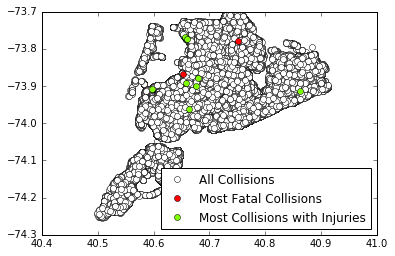

In [112]:
lat_top10_passengerInjured = list(df_top10_passengerInjured.index.get_level_values('LATITUDE'))
lat_top10_passengerInjured.remove('Missing')
lat_top10_passengerInjured.remove('Missing')
lat_top10_passengerInjured.remove('Missing')
long_top10_passengerInjured = list(df_top10_passengerInjured.index.get_level_values('LONGITUDE'))
long_top10_passengerInjured.remove('Missing')
long_top10_passengerInjured.remove('Missing')
long_top10_passengerInjured.remove('Missing')

plot(df_collisions['LATITUDE'], df_collisions['LONGITUDE'], marker='o', color='white', linestyle='None', label='All Collisions')
plot(lat_topPassengerFatal, long_topPassengerFatal, marker='o', color='red', linestyle='None', label='Most Fatal Collisions')
plot(lat_top10_passengerInjured, long_top10_passengerInjured, marker='o', color='chartreuse', linestyle= 'None', label='Most Collisions with Injuries')
xlim(40.4,41)
ylim(-74.3, -73.7)
legend(numpoints=1, loc='best')

savefig('map_passenger.png')